# Supplemental Figure 6

KS-test results comparing the feature distributions per institution across genotypes.

## Import libraries

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(arrow))
suppressPackageStartupMessages(library(RColorBrewer))

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”
Warning message:
“package ‘arrow’ was built under R version 4.2.3”
Warning message:
“package ‘RColorBrewer’ was built under R version 4.2.3”


## Set paths

In [2]:
figure_dir <- "../figures/supplementary"
output_supp_figure <- file.path(figure_dir, "supp_figure_6_kstestgenotype.png")

## Load in KS-test results

In [3]:
# Load data
kstest_results_file <- file.path("../../3.assess_generalizability/results/ks_test_derivatives_results_qc.parquet")

kstest_results_df <- arrow::read_parquet(kstest_results_file)

# Filter only ks test results from each genotype
kstest_results_df <- kstest_results_df %>%
    filter(genotype_comparison != "All")

# Create a new column extracting the first part of 'feature' after the compartment
kstest_results_df$feature_base <- sub("^[^_]+_", "", kstest_results_df$feature)

# Update the channel column where anything other than DAPI, CY5, GFP, or RFP is called "other"
kstest_results_df$channel <- ifelse(kstest_results_df$channel %in% c("DAPI", "CY5", "GFP", "RFP"), kstest_results_df$channel, "Other")

# Update the channel names
kstest_results_df$channel <- recode(kstest_results_df$channel, "DAPI" = "Nuclei", "GFP" = "ER", "CY5" = "Mito", "RFP" = "F-actin")

dim(kstest_results_df)
head(kstest_results_df)

[1] 1788   14

feature,ks_stat,p_value,genotype_comparison,feature_importances,compartment,feature_group,measurement,channel,parameter1,parameter2,parameter3,__index_level_0__,feature_base
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
Cytoplasm_AreaShape_Eccentricity,0.1585151,1.911421e-14,WT,0.03499314,Cytoplasm,AreaShape,Eccentricity,Other,NA,NA,NA,0,AreaShape_Eccentricity
Cytoplasm_AreaShape_Eccentricity,0.1746846,7.815230e-10,Null,0.03499314,Cytoplasm,AreaShape,Eccentricity,Other,NA,NA,NA,1,AreaShape_Eccentricity
Cytoplasm_AreaShape_FormFactor,0.3128205,1.254668e-55,WT,1.23824428,Cytoplasm,AreaShape,FormFactor,Other,NA,NA,NA,3,AreaShape_FormFactor
Cytoplasm_AreaShape_FormFactor,0.2154133,9.352392e-15,Null,1.23824428,Cytoplasm,AreaShape,FormFactor,Other,NA,NA,NA,4,AreaShape_FormFactor
Cytoplasm_AreaShape_MajorAxisLength,0.5453502,9.052268e-175,WT,0.05524868,Cytoplasm,AreaShape,MajorAxisLength,Other,NA,NA,NA,6,AreaShape_MajorAxisLength
Cytoplasm_AreaShape_MajorAxisLength,0.3589934,9.515823e-41,Null,0.05524868,Cytoplasm,AreaShape,MajorAxisLength,Other,NA,NA,NA,7,AreaShape_MajorAxisLength


## Generate supplemental figure 6

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


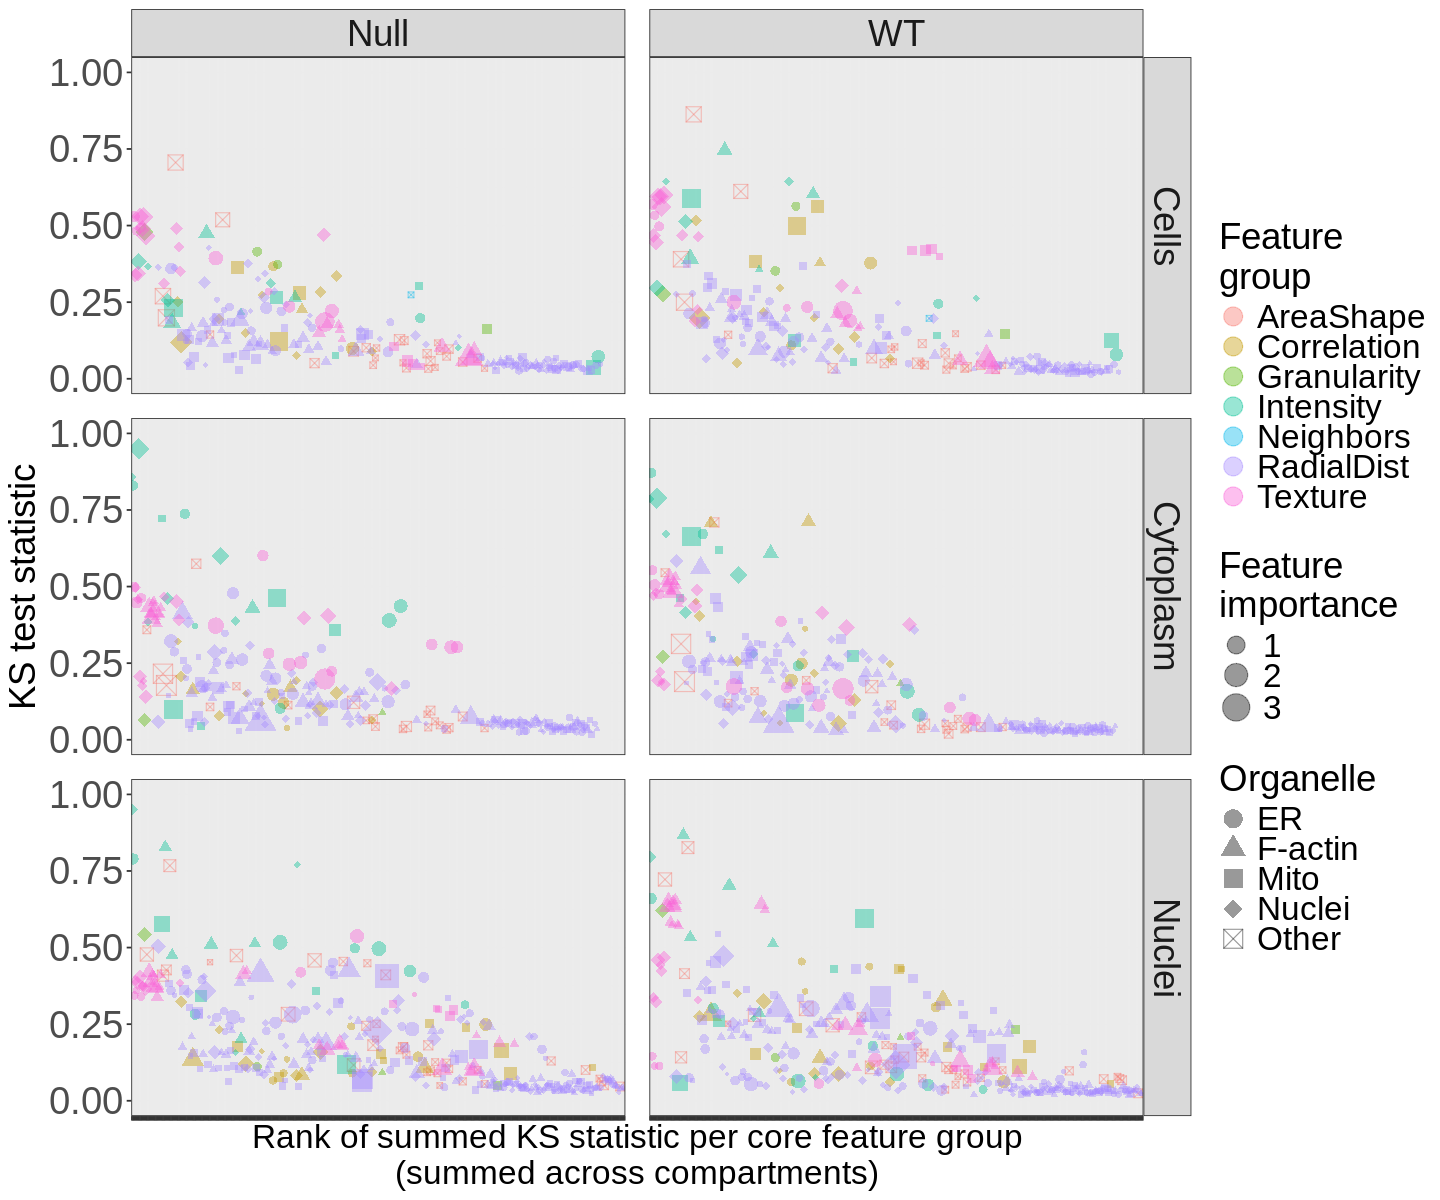

In [4]:
width <- 12
height <- 10
options(repr.plot.width = width, repr.plot.height = height)

# Update feature group name
kstest_results_df$feature_group <- ifelse(kstest_results_df$feature_group == "RadialDistribution", "RadialDist", kstest_results_df$feature_group)

# Reorder feature_base based on the sum of the base feature across all compartments
kstest_results_df$feature_base <- factor(kstest_results_df$feature_base, 
                                         levels = kstest_results_df %>% 
                                           group_by(feature_base) %>% 
                                           summarise(total_ks = sum(ks_stat)) %>% 
                                           arrange(desc(total_ks)) %>% 
                                           pull(feature_base))

# Create the plot
supp_fig_gg <- (
    ggplot(kstest_results_df, aes(x = feature_base, y = ks_stat))
    + geom_point(aes(color = feature_group, size = feature_importances, shape = channel), alpha = 0.4) 
    + theme_bw()
    + facet_grid(compartment ~ genotype_comparison)
    + theme(
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 23),
        axis.title.x = element_text(size = 20),
        axis.title.y = element_text(size = 22),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 22),
        strip.text = element_text(size = 22),
        panel.spacing = unit(1, "lines"),
        legend.position = "right"
    )
    + ylim(0,1)
    + scale_color_discrete(name = "Feature\ngroup")
    + scale_size_continuous(name = "Feature\nimportance", range = c(1, 8)) 
    + scale_shape_manual(name = "Organelle", values = c(16, 17, 15, 18, 7))
    + labs(
        x = "Rank of summed KS statistic per core feature group\n(summed across compartments)",
        y = "KS test statistic"
    )
    + guides(
    shape = guide_legend(override.aes = list(size = 5)), 
    color = guide_legend(override.aes = list(size = 5))
    )
)

# Save or display the plot
ggsave(output_supp_figure, plot = supp_fig_gg, dpi = 500, height = height, width = width)

supp_fig_gg